In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2023-05-23


'2023-05-23'

In [11]:
#set variables

tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

EBconc = '[EB] ' r'$(n M)$'
EB = 'EB'
Expt = 'Expt'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'


In [15]:
#set colors

black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette = [cyan,orange] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]
parameters = [GrowthRate,TimeToNucleate,Lifetime]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


In [5]:
#Open concatenated data frame (mastersheet)

askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')
data

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Rescues,DCX Type,Expt
0,2023-04-24,Brandi,1,8,0,0,7.169000,10.625667,0.674687,0.360812,False,None,Tubulin
1,2023-04-24,Brandi,1,8,0,0,6.634000,10.040000,0.660757,8.811146,False,None,Tubulin
2,2023-04-24,Brandi,1,8,0,0,10.272000,16.733333,0.613865,2.536146,False,None,Tubulin
3,2023-04-24,Brandi,1,8,0,0,5.029000,9.287000,0.541510,11.655812,True,None,Tubulin
4,2023-04-24,Brandi,1,8,0,0,4.708000,6.860667,0.686231,0.611812,False,None,Tubulin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,2023-05-16,Brandi,4,8,0,20,1.230500,1.422333,0.865128,3.332722,False,None,EB3
1036,2023-05-16,Brandi,4,8,0,20,1.391000,1.589667,0.875026,2.621556,False,None,EB3
1037,2023-05-16,Brandi,4,8,0,20,2.354000,2.217167,1.061715,6.679389,False,None,EB3
1038,2023-05-16,Brandi,4,8,0,20,2.068667,2.398445,0.862503,3.346667,False,None,EB3


In [13]:
#Create plots folder

pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/DCX_EB_Dynamics/IRM/8uM-tub/Plots/Plots')

## Seaborn Plots #

TypeError: 'AxesSubplot' object is not subscriptable

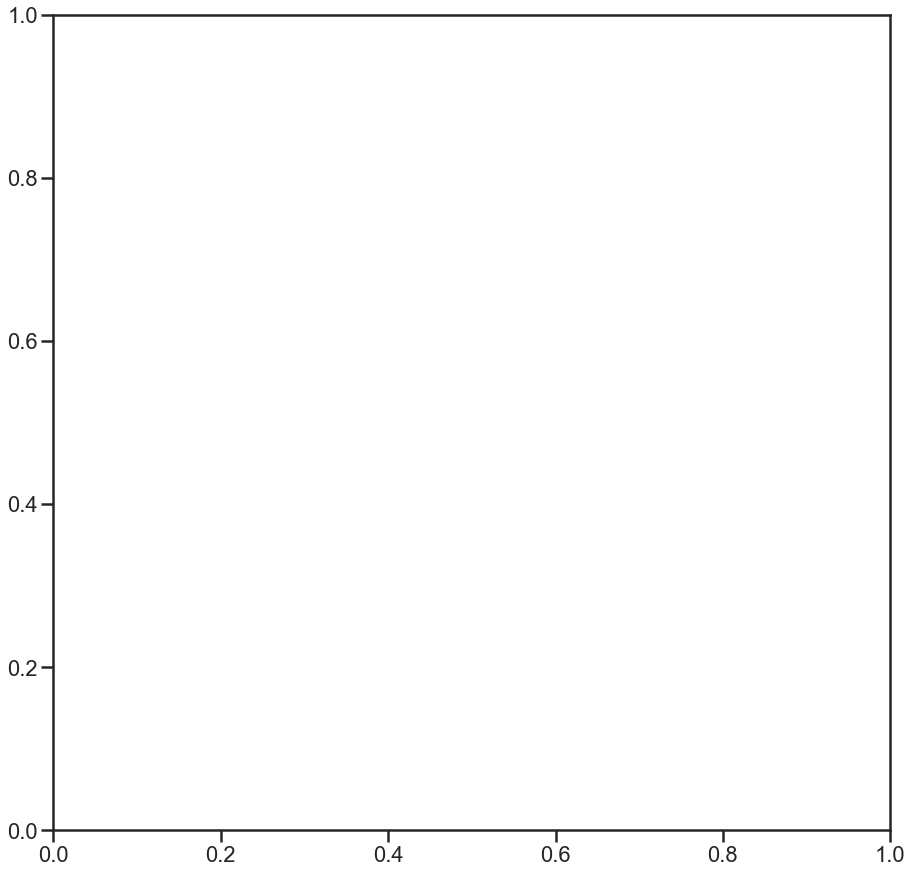

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=EBconc, y=parameters[c], hue=Type, 
                      err_style="bars", marker='o', join=False, capsize=.1,
                        data=data[ (data[tubulin]==8)],err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(path/('tub8uM_DCX-variable'+date+'.pdf'))
plt.savefig(path/('tub8uM_DCX-variable'+date+'.png'))

IndexError: list index out of range

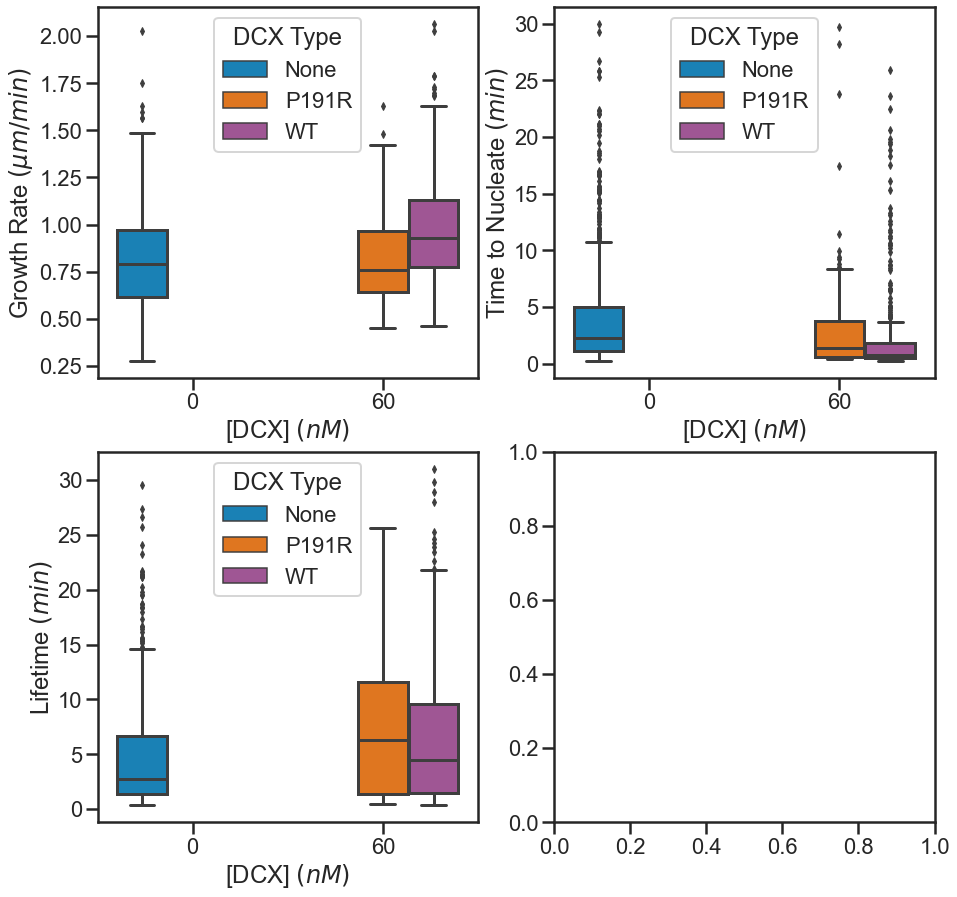

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.boxplot(x=DCXconc, y=parameters[c],
                        hue=Type, dodge = True,
                        data=data[ (data[tubulin]==8)], palette=palette,ax=axs[i][j])
        # sns.swarmplot(x=EBconc, y=parameters[c],
        #                 hue=Type, marker='D', dodge = True,
        #                 data=data[ (data[tubulin]==6)],alpha = 0.8, color="0.7", size=5,ax=axs[i][j])
        
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
# plt.tight_layout()
plt.savefig(path/('tub8uM_DCX-variable'+date+'.tiff'))
plt.savefig(path/('tub8uM_DCX-variable'+date+'.png'))

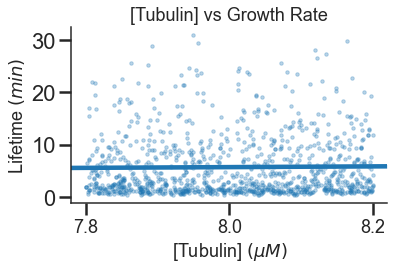

In [26]:
#regplot

ax = sns.regplot(x=tubulin, y=Lifetime, truncate=False, scatter_kws={"s": 12,"alpha":0.3}, data=data, fit_reg=True, x_jitter=.2)

#note: change to truncate=True if you don't want the regression line to go across the whole plot and just where you have data

sns.despine(left=False)
sns.set_style("whitegrid")

sns.set_style("ticks")
plt.rcParams['axes.linewidth'] = 1.5

plt.xlabel('[Tubulin] $(\mu M)$', fontsize=18)
plt.ylabel(Lifetime, fontsize=18)
# plt.yticks(np.arange(0, max(y)+1.5, 0.5),fontsize = 18)

plt.xticks(fontsize =18)
# plt.ylim(0,2)
# plt.xlim(4,14)
plt.tight_layout()
plt.title('[Tubulin] vs Growth Rate', fontsize=18)

plt.savefig(newmydir/('Lifetimes'+date+'.png'),bbox_inches='tight')#bbox_inches-'tight' condenses savefig, prevents title cutoff

plt.show()

In [ ]:
c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.catplot(x=Type, y=parameters[c], hue=EBconc, palette = palette, data=data)
        plt.savefig(path/(date+str(c)+'.jpg'))
        c += 1
sns.despine()

## Matplots #

In [ ]:
plt.scatter(x=tubulin,y=Lifetime,s=85,c=green,marker='v',data=data)

In [ ]:
fig = plt.figure(figsize=(2,2), dpi=200)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(1)
ax.spines['bottom'].set_lw(1)
ax.tick_params(axis='both', width = 1, length = 3)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
ax.set_xlabel(tubulin,fontsize=7)
ax.set_ylabel(GrowthRate, fontsize=7)

x=data[tubulin]
y=data[Lifetime]


# plt.xlim(0, 14)
# plt.ylim(0, 2)

ax.xaxis.set_major_locator(MaxNLocator(7))
ax.yaxis.set_major_locator(MaxNLocator(6))

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,line,grey,label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end

plt.scatter(x,y, marker='.',c=cyan, s=0.5)
plt.legend(fontsize=5)


In [ ]:
fig = plt.figure(figsize=(2,2), dpi=200)
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(1)
ax.spines['bottom'].set_lw(1)
ax.tick_params(axis='both', width = 1, length = 3)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
ax.set_xlabel(EBconc,fontsize=7)
ax.set_ylabel(Lifetime, fontsize=7)

x=data[EBconc]
y=data[Lifetime]
c=data[DCXconc]

plt.xlim(-10, 30)


ax.xaxis.set_major_locator(MaxNLocator(2))
ax.yaxis.set_major_locator(MaxNLocator(6))

plt.scatter(x,y, marker='.',c=cyan, s=0.5)
plt.legend(fontsize=5)


## Violin Plots #

In [43]:
#create grouped dataframe for plot 

df1=(data.groupby('Expt')[Lifetime].agg(lambda x:list(x)))
df1

df2=(data.groupby('Expt')[TimeToNucleate].agg(lambda x:list(x)))
df2

Expt
EB3          [1.122527784, 1.847638842, 4.343694451, 0.8296...
P191R        [1.715166667, 0.6275, 1.045833333, 1.3805, 0.5...
P191R+EB3    [3.1375001, 1.213166607, 5.954277984, 29.65983...
Tubulin      [0.3608125, 8.811145833, 2.536145833, 11.65581...
WT           [0.571722216, 1.199222216, 0.529888882, 0.4601...
WT+EB        [17.52816667, 18.36483333, 9.830833333, 0.5717...
Name: Time to Nucleate $(min)$, dtype: object

In [44]:
#confirm plot index

df1.index
df2.index

Index(['EB3', 'P191R', 'P191R+EB3', 'Tubulin', 'WT', 'WT+EB'], dtype='object', name='Expt')

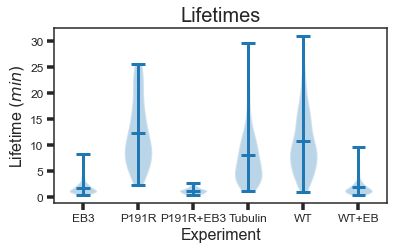

In [49]:
#generate plots

labels = df1.index
fig, ax = plt.subplots()

ax.set_title('Lifetimes', fontsize=20)

ax.violinplot(df1, showmeans=True)
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)

ax.set_xlabel('Experiment', fontsize=16)
ax.set_ylabel(Lifetime, fontsize=16)
ax.tick_params(axis='both', width = 3.5, length = 7, labelsize=12)
plt.tight_layout()

fig.savefig(newmydir/(date+'8uMtub_violin.jpg'))

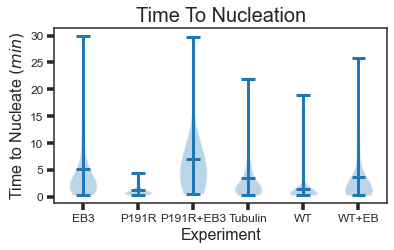

In [54]:
labels = df2.index
fig, ax = plt.subplots()

ax.set_title('Time To Nucleation', fontsize=20)

ax.violinplot(df2, showmeans=True)
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)

ax.set_xlabel('Experiment', fontsize=16)
ax.set_ylabel(TimeToNucleate, fontsize=16)
ax.tick_params(axis='both', width = 3.5, length = 7, labelsize=12)
plt.tight_layout()

fig.savefig(newmydir/(date+'8uMtub_violin.jpg'))

## Fit Data Plots #

In [ ]:
#Open saved Fit parameters

askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to t
# the selected file
ResultFit = pd.read_csv(askFitParam, encoding='utf-8')
ResultFit

In [ ]:
plotLT = ResultFit[(ResultFit['Parameter']==Lifetime) & (ResultFit['Moment']=='Mean')]
plotLT

In [ ]:
scattersize = 12
cap = 5

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shrinkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

fig, ax = plt.subplots(2,2,figsize=(21,21))

count = 0
for dcxtype in ResultFit[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')]
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
    
            parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[c]]

            x = parameterMeanDF[EBconc].values
            y = parameterMeanDF['Fit'].values
            yerr = parameterMeanDF['SE'].values
            ax[i][j].errorbar(x , y , yerr= yerr , fmt=' ',marker='o', markersize=scattersize,capsize = cap,
                                          markeredgewidth=4, alpha = 1 ,color=palette[count])

            c += 1

    count += 1

# ax[0][0].set_ylim(0,1)
# ax[1][0].set_ylim(0,18)
# ax[0][1].set_ylim(0,10)
# ax[1][1].set_ylim(0,18)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-5,23)
        ax[i][j].set_xlabel(EBconc)
        #ax[i][j].set_xticks(np.arange(0, 23, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        ax[i][1].legend((Type_order),loc='upper right',title='DCX Type')
        ax[i][j].set_title(titles[count])
        
        count += 1

ax[0][0].legend((Type_order),loc='upper right',title='DCX Type')


plt.savefig(path/('expansion_'+date+'.png'))

In [ ]:
#Histograms

def plot_hist(data, tubconc, dcxtype, dcxconc,ebconc,color) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
    fig, ax = plt.subplots(2,2,figsize=(21,21))
    
    n = len(selectdata.dropna().index)
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            parameter = parameters[c]

            if parameter == GrowthRate :
                maxbin = 1.5
                binsize = 0.025
#             elif parameter == ShrinkageRate :
#                 maxbin = 25
#                 binsize = 0.5
            else:
                maxbin = 30
                binsize = 0.5

            ax[i][j].hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), 
                          density=True,color = color,alpha = 0.5);
            ax[i][j].set_xlabel(parameter)
            ax[i][j].set_ylabel('Probability')
            ax[1][1].set_xlim(0,maxbin)
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['left'].set_lw(3)
            ax[i][j].spines['bottom'].set_lw(3)
            
            c += 1
    
    selectcoeff = ResultFit.dropna(subset=['Coefficient'])
    selectcoeff=selectcoeff[(selectcoeff[tubulin]==tubconc) & (selectcoeff[Type]==dcxtype) 
                            & (selectcoeff[DCXconc]==dcxconc)& (selectcoeff[EBconc]==ebconc)]
    
    x = np.arange(0, 1.5 + 0.025, 0.025)
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[0][0].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    x = np.arange(0, 30 + 0.5, 0.5)
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[1]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    ax[0][1].plot(x, exponential(x, scale),color = color, lw=4);
    
    shape = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][0].plot(x, gamma(x, shape, scale),color = color, lw=4);
            
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][1].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    legnd = str(ebconc)+' nM'
    ax[0][1].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    ax[1][0].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    
    plt.savefig(newmydir/('joint_graphsHIST-'+dcxtype+'-'+str(dcxconc)+'.jpg'))
    
    return print(n)

plot_hist(data, 10, 'R76S', 60,20,blue)

In [ ]:
#Reproducibility

tubconc = 10
dcxtype = 'WT'
dcxconc = 60
ebconc = 0
selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]

fig, axs = plt.subplots(2,2,figsize=(35,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x='Date', y=parameters[c],
                        hue='Ch', err_style="bars", marker='o', join=False, capsize=.1,
                        data=selectdata,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
# axs[0][0].set_ylim(0,1.5)
# axs[1][0].set_ylim(0,18)
# axs[0][1].set_ylim(0,10)
# axs[1][1].set_ylim(0,18)       
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()


In [ ]:
#Rescues

def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                for ebconc in data[EBconc].unique():

                    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
                    n =  selectdata[Type].count()

                    if n == 0:
                        continue
                        
                    rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                    rescue_values = 1-rv.loc[0][0]
                

                #======Making a data frame========
                    r0 = {tubulin:[tubconc], Type:[dcxtype], DCXconc:[dcxconc], EBconc:[ebconc], 'Normalized Rescue': [rescue_values],
                         'n': [n]}
                    results0 = pd.DataFrame(data=r0)
                    results = pd.concat([results, results0], sort=False)

    return results

rescues = rescue_count(data)
rescues

In [ ]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique(): #data[Type].unique()

    x = rescues[ (rescues[tubulin]==10) & (rescues[Type]== dcxtype)][EBconc]

    y = rescues[ (rescues[tubulin]==10) & (rescues[Type]== dcxtype)]['Normalized Rescue']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15)
    
    else:
        
        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15, ls='--',alpha=0.8)

    count += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,1)
ax.set_xlim(-1,77)
ax.set_xlabel( EBconc)


ax.set_title('Rescue')
ax.set_ylabel('Rescue Probability')


ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
# plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsRescues_all.png'))

In [ ]:
#Lifetime parameters

scattersize = 12
cap = 5

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

fig, ax = plt.subplots(2,2,figsize=(21,21))

count = 0
for dcxtype in ResultFit[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype)].dropna(subset=['Coefficient'])
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
    
            parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[c]]

            x = parameterMeanDF[EBconc].values
            y = parameterMeanDF['Fit'].values
            yerr = parameterMeanDF['SE'].values
            ax[i][j].errorbar(x , y , yerr= yerr , fmt=' ',marker='o', markersize=scattersize,capsize = cap,
                                          markeredgewidth=4, alpha = 1 ,color=palette[count])

            c += 1

    count += 1

# ax[0][0].set_ylim(0,1)
# ax[1][0].set_ylim(0,18)
# ax[0][1].set_ylim(0,10)
# ax[1][1].set_ylim(0,18)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-5,23)
        ax[i][j].set_xlabel(EBconc)
        #ax[i][j].set_xticks(np.arange(0, 23, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend((Type_order),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

ax[0][0].legend((Type_order),loc='upper right',title='DCX Type')


#plt.savefig(path/('expansion_'+date_today+'.svg'))

In [ ]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(1,2,figsize=(15,8))
#     plt.suptitle('Fitted pooled data', fontsize=30)
selectcoeff = ResultFit.dropna(subset=['Coefficient'])

count = 0
for dcxtype in data[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Parameter']==Lifetime)
                           & (ResultFit[tubulin]==10)].dropna(subset=['Coefficient'])

    x = dcxtype_DF[(dcxtype_DF['Coefficient']==0)][EBconc].values
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['SE'].values

    ax[0].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['SE'].values

    ax[1].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])
    
    count += 1

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].set_ylim(0,6)
    ax[i].set_xlabel( DCXconc)


ax[0].set_title('Lifetime Shape')
ax[0].set_ylabel( r'$k$')

ax[1].set_title('Lifetime Scale')
ax[1].set_ylabel( r'$\theta \; (min)$')


ax[0].legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_lifetimeparms.svg'))